## Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

### Задание 2. (ниже)


In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('C:\\Users\\alexander.dubovik\\Documents\\PYDA-38\\Statistic_Python\\HW\\04_Correlation_and_correlational_analysis\\water.csv', delimiter=',', header = 0)
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [4]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [3]:
# Проверяю что быдует если удалить выбросы по жесткости:

Q1_h = df['hardness'].quantile(q = .25)
Q3_h = df['hardness'].quantile(q = .75)
IQR_h = df['hardness'].apply(stats.iqr)

df_clean_1 = df[~((df['hardness'] < (Q1_h - 1.5 * IQR_h)) | (df['hardness'] > (Q3_h + 1.5 * IQR_h)))]
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  32 non-null     int64 
 1   location    32 non-null     object
 2   town        32 non-null     object
 3   mortality   32 non-null     int64 
 4   hardness    32 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [4]:
# Проверяю что быдует если удалить выбросы по смертности:

Q1 = df['mortality'].quantile(q = .25)
Q3 = df['mortality'].quantile(q = .75)
IQR = df['mortality'].apply(stats.iqr)

df_clean_2 = df[~((df['mortality'] < (Q1 - 1.5 * IQR)) | (df['mortality'] > (Q3 + 1.5 * IQR)))]
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31 non-null     int64 
 1   location    31 non-null     object
 2   town        31 non-null     object
 3   mortality   31 non-null     int64 
 4   hardness    31 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


При удалении выбросов что в одном, что в другом варианте, мы теряем 50% информации, что не верно и приведет к искаженным вариантам дальнейших расчетов и построения моделей. 
Вывод: оставляю данные исходные.

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

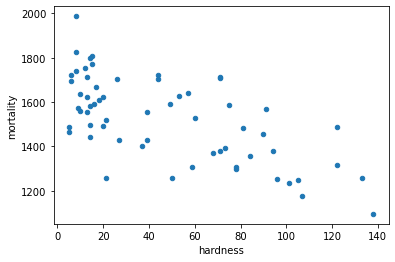

In [5]:
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

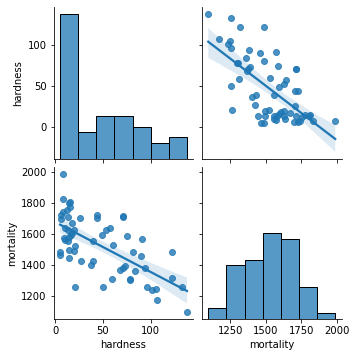

In [6]:
sns.pairplot(df[['hardness', 'mortality']], kind = 'reg')

In [7]:
# считаем коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
# считаем коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [9]:
# считаем коэф. корреляции Кенделла
df[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


#### Вывод: Все три расчета показывают средний обратный коэффициент корреляции.


#### Построить модель линейной регрессии

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = df[['hardness']]
y = df['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [14]:
model.coef_

array([-3.65672017])

In [15]:
model.intercept_

1688.066270653473

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1666.12594964, 1640.52890845, 1669.78266981, 1413.81225794,
       1640.52890845, 1629.55874794, 1201.72248811, 1666.12594964,
       1318.73753354, 1358.9614554 , 1355.30473523, 1640.52890845,
       1636.87218828, 1636.87218828, 1552.76762438, 1391.87193693,
       1344.33457472, 1421.12569828, 1428.43913862])

In [17]:
y_test

40    1696
42    1711
2     1466
49    1587
51    1557
26    1591
34    1259
36    1724
41    1236
39    1456
24    1569
54    1625
46    1495
3     1800
27    1402
59    1485
21    1379
10    1392
53    1709
Name: mortality, dtype: int64

In [18]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.30602504827717636

Коэффициент детерминации слишком мал (менее 0.5) для прогноза. Но в целом модель рабочая


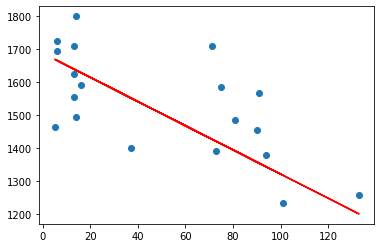

In [21]:
# остатки
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c ='r')

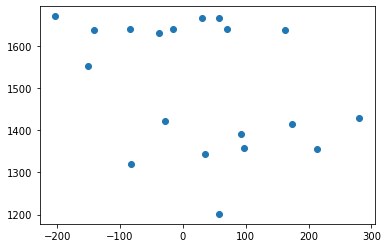

In [26]:
# Остатки:

plt.scatter(y_test - y_pred, y_pred)

### Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [27]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

In [28]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

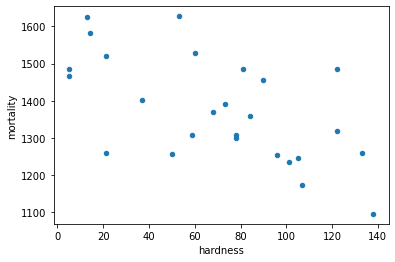

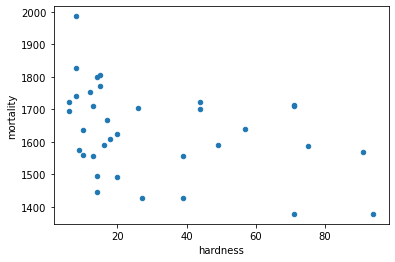

In [29]:
df_south.plot(kind = 'scatter', x = 'hardness', y = 'mortality')
df_north.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

Для южных регионов низкая отрицательная корреляция присутствует, а вот для северных, она не выражена (скорее полностью отсутствует)

In [30]:
# считаем коэф. корреляции Пирсона
df_south[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [31]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [32]:
# считаем коэф. корреляции Спирмана
df_south[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [33]:
# считаем коэф. корреляции Спирмана
df_north[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [34]:
# считаем коэф. корреляции Кенделла
df_south[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [35]:
# считаем коэф. корреляции Кенделла
df_north[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


Как и на графиках, коэф. корреляции подтверждают с большой вероятностью предыдущий вывод, что южные регионы имеют среднюю отрицательную корреляцию, северные - очень отрицательную.


In [36]:
Xs = df_south[['hardness']]
ys = df_south['mortality']

In [37]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.30, random_state = 1)

In [38]:
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [39]:
model_s.coef_

array([-1.87359315])

In [40]:
model_s.intercept_

1520.492357120051

In [41]:
ys_pred = model_s.predict(Xs_test)
ys_pred

array([1331.25944883, 1409.95036119, 1351.8689735 , 1363.11053241,
       1408.07676804, 1261.93650223, 1393.08802283, 1426.81269955])

In [42]:
ys_test

41    1236
33    1309
39    1456
9     1359
56    1527
25    1096
47    1369
48    1257
Name: mortality, dtype: int64

In [43]:
model_s.score(Xs_test, ys_test) # метод возвращает значение коэффициента детерминации

0.19850621188305384

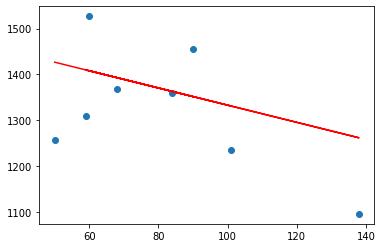

In [39]:

plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c ='r')

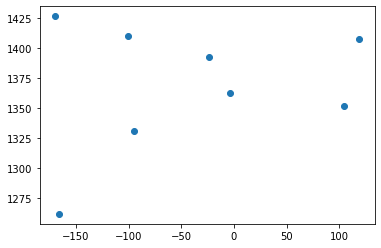

In [44]:
# Остатки:

plt.scatter(ys_test - ys_pred, ys_pred)

Для южных регионов линейная модель может быть использована, но значение коэффициента детерминации низкое и не подходит для прогноза. (вероятно из за не большого кол-ва данных)

In [45]:
Xn = df_north[['hardness']]
yn = df_north['mortality']

In [46]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.30, random_state = 1)

In [47]:
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [48]:
model_n.coef_

array([-3.32783181])

In [49]:
model_n.intercept_

1702.3658062157222

In [50]:
yn_pred = model_n.predict(Xn_test)
yn_pred

array([1399.53311152, 1555.94120658, 1669.08748812, 1466.08974771,
       1635.80917002, 1452.77842048, 1682.39881536, 1655.77616088,
       1675.74315174, 1466.08974771, 1675.74315174])

In [51]:
yn_test

24    1569
31    1702
5     1558
50    1713
55    1625
49    1587
40    1696
46    1495
45    1987
53    1709
29    1828
Name: mortality, dtype: int64

In [52]:
model_n.score(Xn_test, yn_test) # метод возвращает значение коэффициента детерминации

-0.8059562565000893

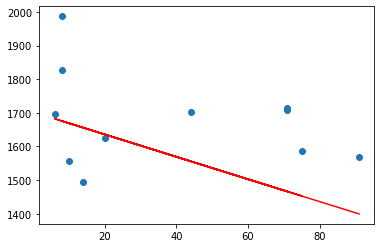

In [48]:
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c ='r')

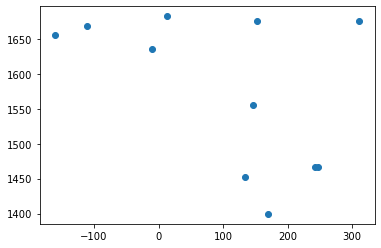

In [53]:
# Остатки:

plt.scatter(yn_test - yn_pred, yn_pred)

Для северного региона линейная модель не подходит (так как очень мало данных для расчета)